In [2]:
import pandas as pd
sales_data = pd.read_csv("https://raw.githubusercontent.com/bradyprice19/Intern-technical/refs/heads/main/sales_data.csv")
titanic = pd.read_csv("https://raw.githubusercontent.com/bradyprice19/Intern-technical/refs/heads/main/titanic_long_format.csv")

# 1. Write SQL code to answer this question - Rank Products by Revenue. Please use sales_data

In [17]:
import sqlite3
connection = sqlite3.connect(':memory:')
# Save the DataFrame to an SQLite table
sales_data.to_sql('sales_data', connection, index=False, if_exists='replace')

query = "SELECT * FROM sales_data"
result = pd.read_sql_query(query, connection)

print(result.head())


   sale_id  product_id sale_date  quantity  price
0        1         101  1/1/2025         2     50
1        2         102  1/1/2025         1     30
2        3         101  1/2/2025         1     50
3        4         103  1/2/2025         3     20
4        5         101  1/3/2025         4     50


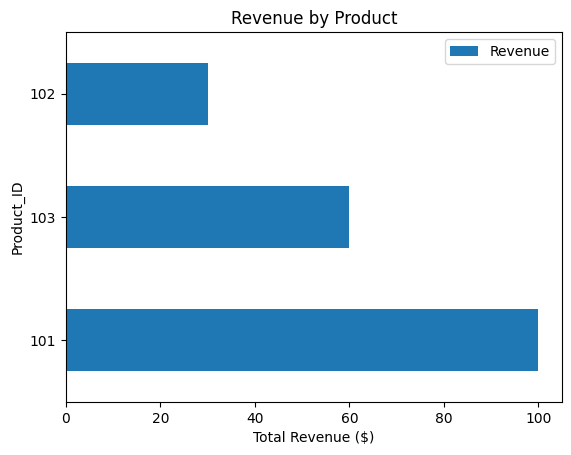

In [26]:
from matplotlib import pyplot as plt
###########################
# Your answer goes below
# q * p = R
# group revenue by product id
# Print that result
# query = """SELECT product_id, quantity * price
#             FROM sales_data
#             GROUP BY product_id,
#             ORDER BY r DESC;"""
query = """SELECT product_id as Product_ID, quantity * price as Revenue
            FROM sales_data
            GROUP BY product_id
            ORDER BY Revenue DESC;"""
result = pd.read_sql_query(query, connection)

# Display the result
result.plot(kind='barh', y='Revenue', x='Product_ID', xlabel="Total Revenue ($)")
plt.title("Revenue by Product")
plt.show()

###########################

In [15]:
connection.close()

# 2. Use Python for this question - Help prepare our titanic dataset for machine learning.

In [22]:
###########################
# Your answer goes below

###########################

# We need to split the dataframe into 10 pieces by each attribute in the attribute column.
# Then concatenate the dataframes together along the passenger Id so that the attributes are associated with each passenger

# explore the data
print(titanic.columns)
titanic['Attribute'].value_counts()
attributes = titanic['Attribute'].value_counts().index
print(attributes)


# next would be to loop through the attributes, obtain dataframes of just the data for each, and then concatenate along passenger ID
# then data cleaning
new_data = {att:[] for att in ["PassengerId", "Name"] + list(attributes)}
groups = titanic.groupby("PassengerId")
for i in range(1, max(titanic["PassengerId"]) + 1):
    curr_group = groups.get_group(i)

    # create the new row for the individual with all of their information
    new_data["PassengerId"].append(i)
    new_data["Name"].append(curr_group["Name"].iloc[0])

    for att in attributes:
        new_data[att].append(curr_group["Value"].values[curr_group["Attribute"] == att][0])

ml_titanic = pd.DataFrame(new_data)

# drop columns that would not be helpful for machine learning
ml_titanic.drop(columns=["Ticket"])
ml_titanic.isna().sum()

Index(['PassengerId', 'Name', 'Attribute', 'Value'], dtype='object')
Index(['Age', 'Sex', 'Pclass', 'Fare', 'Cabin', 'Survived', 'SibSp', 'Parch',
       'Embarked', 'Ticket'],
      dtype='object', name='Attribute')


PassengerId      0
Name             0
Age            177
Sex              0
Pclass           0
Fare             0
Cabin          687
Survived         0
SibSp            0
Parch            0
Embarked         2
Ticket           0
dtype: int64